<a href="https://colab.research.google.com/github/voquangtuong/DL_Tutorial/blob/master/Code8_non_normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GHI CHU 

In [1]:
# # cach dung reakyrelu activation
# from keras.layers import LeakyReLU

# # instead of cnn_model.add(Activation('relu'))
# # use
# cnn_model.add(LeakyReLU(alpha=0.1))
# cai nay chung minh correlation is effective 

code nay giai quyet van de co ban 
Khong su dung cac thong so nang cao trong mo hinh

Trong code nay minh chay lai ket qua cu chinh xác

Để tìm ra các lỗi ban đầu

không nên thay đổi nhiều



# 1. Ket noi GGD

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Thiet lap thu muc dau ra

In [3]:
import os
os.chdir('/content/drive/MyDrive')
out_dirs=['out_fig_code8','out_tab_code8']
for o in out_dirs:
  if not os.path.exists(o):
    os.makedirs(o)

# 3. Nhap cac thu vien can thiet

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# cac thu vien co the duoc bo sung sau
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as KK
#import library
import time
start=time.time()
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from keras import optimizers
import matplotlib
import keras
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from tensorflow.keras import backend as KK
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# Dung thu reakyRELU
from keras.layers import LeakyReLU
import tensorflow as tf


# 3. Cac ham chuc nang

In [5]:
# from numpy import concatenate
# from numpy import sqrt
# from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [6]:
# =============================================================================
# Customize activate functions
# huber loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)
# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return (KK.sigmoid(x) * 3.5) 

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

# Huber losss
def custom_activation1(x):
    
    return (K.sigmoid(x) * 3.5) 

get_custom_objects().update({'custom_activation1': Activation(custom_activation1)})

## 3.1 Chuỗi sang học giám sát

In [7]:
#convert series to supervised learning
def series_to_supervised(data, n_in, n_out, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [8]:
# Ví dụ để hiểu functions series to supevised
datatestfunctions=pd.read_csv("input_data/percentile_101.csv")
valuestestfunctions=datatestfunctions.iloc[0:12,1:2].values
valuestestfunctions.T

array([[-0.09606474, -0.22275164, -0.88735394, -0.29319817,  0.90010905,
         0.24674698, -0.42748195, -0.47456393,  0.36360157,  0.12272328,
        -0.06724645, -0.66061715]])

In [9]:
series_to_supervised(valuestestfunctions,n_in=3,n_out=3)

,var1(t-3),var1(t-2),var1(t-1),var1(t),var1(t+1),var1(t+2)
3,-0.096065,-0.222752,-0.887354,-0.293198,0.900109,0.246747
4,-0.222752,-0.887354,-0.293198,0.900109,0.246747,-0.427482
5,-0.887354,-0.293198,0.900109,0.246747,-0.427482,-0.474564
6,-0.293198,0.900109,0.246747,-0.427482,-0.474564,0.363602
7,0.900109,0.246747,-0.427482,-0.474564,0.363602,0.122723
8,0.246747,-0.427482,-0.474564,0.363602,0.122723,-0.067246
9,-0.427482,-0.474564,0.363602,0.122723,-0.067246,-0.660617


# 4. Doc du lieu

In [10]:
dataset0=pd.read_csv("input_data/percentile_season_adj.csv")
# dataset0.describe()

In [11]:
# lay ten cac cot
list1=dataset0.columns.tolist()
list1
# tinh correlation 


['Date',
 'Andong106',
 'Ansan75',
 'Ansoeng76',
 'Anyang77',
 'Asan25',
 'Boeun13',
 'Bonghwa107',
 'Boryeong26',
 'Boseong186',
 'Buan170',
 'Buan171',
 'Bucheon78',
 'Buk0',
 'Buk264',
 'Buk41',
 'Buk72',
 'Bupyeong154',
 'Busanjin1',
 'Buyeo27',
 'Changnyeong128',
 'Changwon129',
 'Changwon130',
 'Cheonan28',
 'Cheongdo108',
 'Cheongju14',
 'Cheongsong109',
 'Cheongyang29',
 'Cheorwon54',
 'Chilgok110',
 'Chuncheon55',
 'Chungju15',
 'Daedeok49',
 'Dalseo42',
 'Dalseong43',
 'Damyang187',
 'Dangjin30',
 'Danyang16',
 'Dobong240',
 'Dong-daemun241',
 'Dong155',
 'Dong156',
 'Dong265',
 'Dong44',
 'Dong50',
 'Dong73',
 'Dongducheon79',
 'Donghae56',
 'Dongjak242',
 'Dongnae2',
 'Eumseong17',
 'Eun-pyeong243',
 'Gandong244',
 'Gangbuk245',
 'Ganghwa157',
 'Ganghwa158',
 'Ganghwa159',
 'Gangjin188',
 'Gangnam246',
 'Gangneung57',
 'Gangseo247',
 'Gangseo3',
 'Gangseo4',
 'Gapyeong80',
 'Geochang131',
 'Geoje132',
 'Geumjeong5',
 'Geumsan31',
 'Gijang6',
 'Gimcheon111',
 'Gimhae133',
 '

In [12]:
# Bo cot Date va sap xap sep lai
list2=list1[1:]
list2
list3=list2
list3

['Andong106',
 'Ansan75',
 'Ansoeng76',
 'Anyang77',
 'Asan25',
 'Boeun13',
 'Bonghwa107',
 'Boryeong26',
 'Boseong186',
 'Buan170',
 'Buan171',
 'Bucheon78',
 'Buk0',
 'Buk264',
 'Buk41',
 'Buk72',
 'Bupyeong154',
 'Busanjin1',
 'Buyeo27',
 'Changnyeong128',
 'Changwon129',
 'Changwon130',
 'Cheonan28',
 'Cheongdo108',
 'Cheongju14',
 'Cheongsong109',
 'Cheongyang29',
 'Cheorwon54',
 'Chilgok110',
 'Chuncheon55',
 'Chungju15',
 'Daedeok49',
 'Dalseo42',
 'Dalseong43',
 'Damyang187',
 'Dangjin30',
 'Danyang16',
 'Dobong240',
 'Dong-daemun241',
 'Dong155',
 'Dong156',
 'Dong265',
 'Dong44',
 'Dong50',
 'Dong73',
 'Dongducheon79',
 'Donghae56',
 'Dongjak242',
 'Dongnae2',
 'Eumseong17',
 'Eun-pyeong243',
 'Gandong244',
 'Gangbuk245',
 'Ganghwa157',
 'Ganghwa158',
 'Ganghwa159',
 'Gangjin188',
 'Gangnam246',
 'Gangneung57',
 'Gangseo247',
 'Gangseo3',
 'Gangseo4',
 'Gapyeong80',
 'Geochang131',
 'Geoje132',
 'Geumjeong5',
 'Geumsan31',
 'Gijang6',
 'Gimcheon111',
 'Gimhae133',
 'Gimje172'

In [13]:
# chuan bi vong lap cho thay the cac cot
k=0
list4=list3[k:k+1]+list3[k+1:]+list3[:k]
list4

['Andong106',
 'Ansan75',
 'Ansoeng76',
 'Anyang77',
 'Asan25',
 'Boeun13',
 'Bonghwa107',
 'Boryeong26',
 'Boseong186',
 'Buan170',
 'Buan171',
 'Bucheon78',
 'Buk0',
 'Buk264',
 'Buk41',
 'Buk72',
 'Bupyeong154',
 'Busanjin1',
 'Buyeo27',
 'Changnyeong128',
 'Changwon129',
 'Changwon130',
 'Cheonan28',
 'Cheongdo108',
 'Cheongju14',
 'Cheongsong109',
 'Cheongyang29',
 'Cheorwon54',
 'Chilgok110',
 'Chuncheon55',
 'Chungju15',
 'Daedeok49',
 'Dalseo42',
 'Dalseong43',
 'Damyang187',
 'Dangjin30',
 'Danyang16',
 'Dobong240',
 'Dong-daemun241',
 'Dong155',
 'Dong156',
 'Dong265',
 'Dong44',
 'Dong50',
 'Dong73',
 'Dongducheon79',
 'Donghae56',
 'Dongjak242',
 'Dongnae2',
 'Eumseong17',
 'Eun-pyeong243',
 'Gandong244',
 'Gangbuk245',
 'Ganghwa157',
 'Ganghwa158',
 'Ganghwa159',
 'Gangjin188',
 'Gangnam246',
 'Gangneung57',
 'Gangseo247',
 'Gangseo3',
 'Gangseo4',
 'Gapyeong80',
 'Geochang131',
 'Geoje132',
 'Geumjeong5',
 'Geumsan31',
 'Gijang6',
 'Gimcheon111',
 'Gimhae133',
 'Gimje172'

In [14]:
# Du lieu sao khi chuyen cot du bao ra dau
dataset00=dataset0[list4]
dataset00

,Andong106,Ansan75,Ansoeng76,Anyang77,Asan25,Boeun13,Bonghwa107,Boryeong26,Boseong186,Buan170,Buan171,Bucheon78,Buk0,Buk264,Buk41,Buk72,Bupyeong154,Busanjin1,Buyeo27,Changnyeong128,Changwon129,Changwon130,Cheonan28,Cheongdo108,Cheongju14,Cheongsong109,Cheongyang29,Cheorwon54,Chilgok110,Chuncheon55,Chungju15,Daedeok49,Dalseo42,Dalseong43,Damyang187,Dangjin30,Danyang16,Dobong240,Dong-daemun241,Dong155,...,Wando224,Wando225,Wando226,Wando227,Wando228,Wando229,Wando230,Wando231,Wando232,Wanju185,Wonju68,Yangcheon261,Yanggu69,Yangju101,Yangpyeong102,Yangsan153,Yangyang70,Yecheon123,Yeoju103,Yeoncheon104,Yeongam233,Yeongcheon124,Yeongdeok125,Yeongdeungpo262,Yeongdo11,Yeongdong24,Yeonggwang234,Yeongi239,Yeongju126,Yeongwol71,Yeongyang127,Yeonje12,Yeosu235,Yeosu236,Yeosu237,Yeosu238,Yesan40,Yongin105,Yongsan263,Yuseong53
0,-0.068793,0.007370,-0.043025,0.027512,-0.016300,-0.135790,-0.280612,-0.085975,0.000382,0.010484,0.006280,0.018972,-0.013240,0.180639,0.058954,0.111425,-0.348126,0.074321,0.030633,-0.136730,-0.106414,0.115682,0.074885,0.043213,-0.017936,-0.147586,-0.349976,-0.373941,0.027995,-0.300738,-0.288500,-0.020772,-0.163009,-0.087655,-0.246005,-0.101062,-0.279076,-0.350928,-0.245401,-0.324744,...,-0.013955,0.164799,0.067646,0.127357,-0.196007,-0.064919,0.124725,0.110258,0.109936,0.114082,-0.105871,-0.245509,-0.255475,-0.288880,-0.264224,-0.198930,-0.262297,-0.303282,-0.146950,-0.214944,-0.338890,-0.241755,-0.278760,-0.276730,-0.230615,-0.254436,-0.226088,-0.360223,-0.268837,-0.262598,-0.267553,-0.254590,-0.192182,-0.253589,-0.282550,-0.340427,-0.311349,-0.341370,-0.337228,-0.397738
1,-0.191194,-0.237572,-0.179815,-0.001349,-0.172738,-0.127369,-0.152398,-0.155773,-0.229314,-0.231227,-0.231224,-0.244268,-0.213504,-0.594912,0.036537,-0.184171,-0.599457,-0.150594,-0.392935,-0.177609,-0.303816,-0.092468,-0.080002,-0.310935,-0.224242,-0.264360,-0.761589,-0.106518,-0.329234,-0.071552,0.213725,-0.181485,-0.122219,-0.229894,-0.277321,-0.228362,-0.418940,0.471807,-0.378842,0.253658,...,0.375895,0.486931,0.397852,0.441008,-0.118358,-0.398302,-0.087127,-0.076630,-0.264790,-0.231785,-0.193851,0.031028,0.025802,0.041053,-0.001360,0.082747,0.008690,0.033101,0.034159,0.079708,0.082600,0.075339,-0.000386,0.002848,0.062447,-0.017866,0.042617,0.036308,-0.012414,-0.007019,0.019740,0.092779,0.055353,0.034344,0.004484,-0.517457,-0.421862,-0.531180,-0.500850,-0.460279
2,-0.928368,-1.075123,-0.868374,-0.598571,-0.933116,-0.607044,-0.244022,-0.720911,-1.047755,-1.076924,-1.058379,-1.096922,-0.959023,-1.078453,0.457884,-0.705629,-0.614041,-0.393737,-0.602754,-0.324907,-0.259543,-0.017261,-0.215103,-0.260946,-0.236655,-0.619377,-1.286124,-1.196967,-0.634234,-0.999054,-0.701751,0.657221,-0.534944,0.006010,-0.903444,-0.385954,-0.920062,-0.805763,-0.892864,-0.711937,...,0.542764,-0.979452,0.096761,-0.582642,0.753552,0.384621,0.490894,0.644722,0.649151,0.604394,-0.249969,-0.351794,-0.352805,-0.295613,-0.383737,-0.240371,-0.386762,-0.300212,-0.200629,-0.180021,-0.202351,-0.269378,-0.420450,-0.408976,-0.297710,-0.352436,-0.328181,-0.278983,-0.397325,-0.402184,-0.352920,-0.230717,-0.216342,-0.284498,-0.383753,0.826897,0.783475,1.020876,0.887536,0.286632
3,-0.266323,-0.317591,-0.239929,-0.103243,-0.272606,-0.139844,-0.007131,-0.185271,-0.307400,-0.318330,-0.312773,-0.324719,-0.278742,0.509447,0.375825,-0.973084,-0.029783,-0.219534,-0.328728,-0.311132,0.130150,0.202358,-0.072026,-0.057958,-0.285768,-0.515109,-0.831655,-0.976884,-0.524940,-0.781619,-0.324776,-0.375299,-0.470120,-0.114243,-0.526372,-0.465329,-0.612884,-0.147137,-0.495887,-0.227538,...,-0.038850,0.153984,0.033059,0.103491,-0.189755,-0.126091,-0.459405,-0.435005,-0.641743,-0.624528,-0.231823,-0.230910,-0.251573,-0.311990,-0.244202,-0.264677,-0.229165,-0.388655,-0.366467,-0.352500,-0.392690,-0.270364,-0.211523,-0.222657,-0.236521,-0.300754,-0.242719,-0.432637,-0.249514,-0.248730,-0.277215,-0.322729,-0.338375,-0.318861,-0.260244,0.183783,0.198141,0.220794,0.199073,0.072470
4,0.894040,1.404446,1.074264

# Tinh correlation

In [15]:
corr=dataset00.corr()
df=corr
df

,Andong106,Ansan75,Ansoeng76,Anyang77,Asan25,Boeun13,Bonghwa107,Boryeong26,Boseong186,Buan170,Buan171,Bucheon78,Buk0,Buk264,Buk41,Buk72,Bupyeong154,Busanjin1,Buyeo27,Changnyeong128,Changwon129,Changwon130,Cheonan28,Cheongdo108,Cheongju14,Cheongsong109,Cheongyang29,Cheorwon54,Chilgok110,Chuncheon55,Chungju15,Daedeok49,Dalseo42,Dalseong43,Damyang187,Dangjin30,Danyang16,Dobong240,Dong-daemun241,Dong155,...,Wando224,Wando225,Wando226,Wando227,Wando228,Wando229,Wando230,Wando231,Wando232,Wanju185,Wonju68,Yangcheon261,Yanggu69,Yangju101,Yangpyeong102,Yangsan153,Yangyang70,Yecheon123,Yeoju103,Yeoncheon104,Yeongam233,Yeongcheon124,Yeongdeok125,Yeongdeungpo262,Yeongdo11,Yeongdong24,Yeonggwang234,Yeongi239,Yeongju126,Yeongwol71,Yeongyang127,Yeonje12,Yeosu235,Yeosu236,Yeosu237,Yeosu238,Yesan40,Yongin105,Yongsan263,Yuseong53
Andong106,1.000000,0.993215,0.997937,0.889065,0.997062,0.982799,0.722655,0.994933,0.994380,0.994716,0.994020,0.991588,0.995794,0.230946,-0.140403,0.015430,-0.374572,-0.052772,0.061762,-0.203139,-0.030969,-0.078103,-0.059856,0.075799,-0.079606,0.197278,0.265091,0.108590,0.158283,0.140974,0.074627,-0.004128,0.079466,-0.005900,0.168665,0.046651,0.096268,0.032004,0.189861,0.079879,...,0.236136,0.328130,0.287394,0.316042,-0.218368,0.050148,0.072892,0.045777,-0.021676,-0.005018,0.030486,0.103916,0.103788,0.113110,0.111505,0.049720,0.109577,0.094148,0.069487,0.091374,0.116536,0.088316,0.114316,0.113411,0.089316,0.107995,0.091709,0.104002,0.111926,0.107320,0.105436,0.075860,0.088930,0.108329,0.112897,0.131672,0.150178,0.127820,0.139361,0.168277
Ansan75,0.993215,1.000000,0.997134,0.875040,0.990182,0.963165,0.681301,0.986671,0.999908,0.999756,0.999943,0.999908,0.999420,0.225880,-0.152285,0.015840,-0.395642,-0.056584,0.057075,-0.212473,-0.048223,-0.086440,-0.071466,0.055951,-0.097231,0.196520,0.258132,0.092253,0.154290,0.126852,0.070781,-0.019895,0.062103,-0.026742,0.162255,0.025562,0.080565,0.030980,0.185272,0.076711,...,0.236838,0.317370,0.282553,0.306232,-0.231592,0.025662,0.088987,0.062118,-0.010321,0.000165,0.013008,0.102176,0.102139,0.111196,0.109746,0.049413,0.108016,0.092137,0.061089,0.085673,0.114732,0.087097,0.113298,0.112282,0.088004,0.105336,0.089681,0.102252,0.110255,0.105527,0.103773,0.074590,0.082967,0.105428,0.111488,0.102970,0.122075,0.104011,0.112935,0.114860
Ansoeng76,0.997937,0.997134,1.000000,0.890334,0.994493,0.979977,0.719568,0.995568,0.997888,0.997601,0.997534,0.996213,0.999069,0.231242,-0.139799,0.006670,-0.390114,-0.057124,0.058217,-0.210617,-0.033637,-0.077193,-0.062399,0.072835,-0.087656,0.193661,0.259534,0.101818,0.153791,0.135472,0.068146,-0.005038,0.074563,-0.006990,0.162516,0.044036,0.088422,0.026862,0.184425,0.074118,...,0.235594,0.321434,0.283020,0.309230,-0.232613,0.045142,0.078327,0.051517,-0.019577,-0.006367,0.026335,0.102366,0.102264,0.111627,0.110252,0.047082,0.108351,0.092005,0.064174,0.087496,0.114965,0.086412,0.113568,0.112555,0.087451,0.106161,0.089602,0.102177,0.110744,0.105920,0.103927,0.073474,0.084975,0.106248,0.111821,0.137694,0.157817,0.136396,0.146828,0.160911
Anyang77,0.889065,0.875040,0.890334,1.000000,0.911977,0.889162,0.657678,0.895596,0.878157,0.881029,0.878622,0.872572,0.883084,0.249419,0.017531,-0.084981,-0.298695,-0.058303,0.051615,-0.247344,0.103968,0.045592,0.063676,0.138815,-0.102889,0.207478,0.304139,0.154455,0.190323,0.191327,0.125578,0.043388,0.171466,0.125030,0.220508,0.139163,0.169903,0.076521,0.240390,0.137349,...,0.166140,0.232214,0.170908,0.206354,-0.334486,0.028970,0.194987,0.173670,0.100093,0.118643,0.148424,0.057425,0.054405,0.068333,0.066498,-0.012643,0.062649,0.037994,0.077163,0.079280,0.070633,0.035510,0.066520,0.065531,0.038795,0.065554,0.042807,0.047628,0.065727,0.058551,0.055340,0.017181,0.076919,0.070251,0.065160,0.106426,0.127874,0.104257,0.115148,0.134727
Asan25,0.997062,0.990182,0.994493,0.911977,1.000000,0.975433,0.699537,0.989626,0.991411,0.992736,0.991506,0.988468,0.992628,0.228618,-0.127731,0.013062,-0.362105,-0.050575,0.060668,-0.207746,-0.020

In [16]:
# correlation hon 0.9
df1 = df[df.columns[df.iloc[0,:] > 0.9]]
df1

,Andong106,Ansan75,Ansoeng76,Asan25,Boeun13,Boryeong26,Boseong186,Buan170,Buan171,Bucheon78,Buk0
Andong106,1.000000,0.993215,0.997937,0.997062,0.982799,0.994933,0.994380,0.994716,0.994020,0.991588,0.995794
Ansan75,0.993215,1.000000,0.997134,0.990182,0.963165,0.986671,0.999908,0.999756,0.999943,0.999908,0.999420
Ansoeng76,0.997937,0.997134,1.000000,0.994493,0.979977,0.995568,0.997888,0.997601,0.997534,0.996213,0.999069
Anyang77,0.889065,0.875040,0.890334,0.911977,0.889162,0.895596,0.878157,0.881029,0.878622,0.872572,0.883084
Asan25,0.997062,0.990182,0.994493,1.000000,0.975433,0.989626,0.991411,0.992736,0.991506,0.988468,0.992628
...,...,...,...,...,...,...,...,...,...,...,...
Yeosu238,0.131672,0.102970,0.137694,0.099381,0.271706,0.214075,0.111392,0.102674,0.100140,0.100109,0.120384
Yesan40,0.150178,0.122075,0.157817,0.117736,0.292010,0.234322,0.130439,0.121392,0.119306,0.119292,0.140051
Yongin105,0.127820,0.104011,0.136396,0.095610,0.264408,0.210469,0.111977,0.103010,0.100913,0.101712,0.120490
Yongsan263,0.139361,0.112935,0.146828,0.107091,0.278114,0.222158,0.121146,0.112258,0.110003,0.110331,0.130043


Text(0.5, 1.0, 'Zones have correlation > 0.9 at  Andong106')

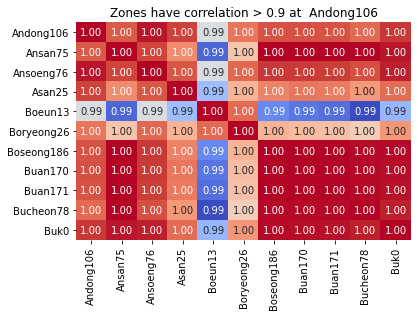

In [17]:
import seaborn as sns
# plot test
fig, ax = plt.subplots()
sns.heatmap(df1.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
# ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Zones have correlation > 0.9 at  "+list2[k])

## Cach chia du lieu cho nhieu bien dau vao
* 3 loại dữ liệu: train,test, val

In [18]:
df1.columns.to_list() # ten cua cac cot correlation


['Andong106',
 'Ansan75',
 'Ansoeng76',
 'Asan25',
 'Boeun13',
 'Boryeong26',
 'Boseong186',
 'Buan170',
 'Buan171',
 'Bucheon78',
 'Buk0']

In [19]:
# muon du bao bien nao thi phai cho bien do thanh cot sau cung
listpredict=df1.columns.to_list()[1:]+df1.columns.to_list()[0:1]
listpredict
# du lieu duoc chon ra
datacor=dataset0[listpredict]
datacor.shape

(432, 11)

In [20]:
# can chia ra X va y de training mo hinh
# bo nam 2015,2015, lay tu 1981-2014
# values0=datacor.values # 1981-2016 # chi tinh corel
values0=dataset00.iloc[:,0:].values # dung toan bo 269 zones
#dataset00 da bo cai Date
values0.shape
values=values0[0:34*12,:] # lay 34 nam
values.shape
values=values.astype('float32')

In [21]:
values_train=values[0:23*12,:] # train
values_train.shape
values_test=values[23*12:34*12,:] #test
values_test.shape
values_val=values0[34*12:36*12,:] # val
values_val.shape


(24, 269)

In [22]:
# # Normalize values truoc khi dua vao mo hinh
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# train
# # scaler=sc
# scaled_train = scaler.fit_transform(values_train)
# scaled_test = scaler.fit_transform(values_test)
# scaled_val = scaler.fit_transform(values_val)


In [23]:
# reframe data
n_in0=6 # lag time 3 thang.
n_features=datacor.shape[1] # chi tinh corel
# n_features=values0.shape[1] # da bo Date
n_obs=n_in0*n_features
n_out0=3
# reframed_train = series_to_supervised(scaled_train, n_in=n_in0, n_out=n_out0)
# reframed_test = series_to_supervised(scaled_test, n_in=n_in0, n_out=n_out0)
# reframed_val = series_to_supervised(scaled_val, n_in=n_in0, n_out=n_out0)
reframed_train = series_to_supervised(values_train, n_in=n_in0, n_out=n_out0)
reframed_test = series_to_supervised(values_test, n_in=n_in0, n_out=n_out0)
reframed_val = series_to_supervised(values_val, n_in=n_in0, n_out=n_out0)


In [24]:
reframed_train.shape

(262, 4035)

In [25]:
# # Split data to train, test
# # split into input and outputs
# train_X, train_y = reframed_train.values[:, :-1], reframed_train.values[:, -1]
# test_X, test_y = reframed_test.values[:, :-1], reframed_test.values[:, -1]

# boi vi gio tinh cho nhieu biet nen y khong con la mot cot ma la nhieu cot
# Split data to train, test
# split into input and outputs
train_X, train_y = reframed_train.values[:, :n_obs], reframed_train.values[:, -n_features:]
test_X, test_y = reframed_test.values[:, :n_obs], reframed_test.values[:, -n_features:]
print(train_X.shape, len(train_X), train_y.shape)

(262, 132) 262 (262, 11)


In [26]:
test_y.shape

(118, 11)

In [27]:
# # Reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# Reshape input to be 3D [samples, timesteps, features]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_in0, n_features))
test_X = test_X.reshape((test_X.shape[0], n_in0, n_features))

In [28]:
KK.clear_session()
    # optimization
number_units0=300
number_epochs0=800
number_batch0=32
learing_rate0=0.001
# activation_function0='custom_activation'
activation_function0='linear'
# activation_function0='LeakyReLU'
dropout0=0.1
patience0=100
optimizer_function0=optimizers.Adam(learing_rate0)
loss='mse'
# loss='huber'
import matplotlib.pyplot as pyplot
# design network
model = Sequential()
model.add(LSTM(number_units0, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(number_units0,return_sequences=True))
model.add(LSTM(number_units0,return_sequences=True))
model.add(LSTM(number_units0))
model.add(Dropout(dropout0))
model.add(Dense(n_features,activation= activation_function0)) # ORG
# model.add(LeakyReLU(alpha=0.1))
 
# model.add(Dense(n_out0,activation= activation_function0))
# model.add(Dense(n_features))
# model.add(LeakyReLU(alpha=0.5))
model.compile(loss=loss, optimizer=optimizer_function0)
model.summary()
# callbacks_stop = [EarlyStopping(monitor='val_loss', patience=patience,min_delta=0)]
callbacks_stop = [EarlyStopping(monitor='val_loss', patience=patience0)]
# model.compile(loss='mae', optimizer='adam')
# fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# fit network using ES
history = model.fit(train_X, train_y, epochs=number_epochs0, batch_size=number_batch0, validation_data=(test_X, test_y),
                    verbose=0, shuffle=False,callbacks=callbacks_stop)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 300)           374400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 300)           721200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 300)           721200    
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                3311      
Total params: 2,541,311
Trainable params: 2,541,311
Non-trainable params: 0
______________________________________________

In [29]:
yhat = model.predict(test_X)

In [30]:
yhat.shape

(118, 11)

In [31]:
test_y.shape

(118, 11)

# 4. Tinh sai so

In [32]:
rmse_all, mape_all=list(),list()
for t in range(n_features):
  rmse_all.append(sqrt(mean_squared_error(yhat[:,t], test_y[:,t])))
  mape_all.append(sqrt(mean_absolute_percentage_error(yhat[:,t], test_y[:,t])))

In [33]:
rmse_min=np.min(rmse_all)
rmse_min

0.5425196375127306

In [34]:
rmse_min_index=rmse_all.index(np.min(rmse_all))
rmse_min_index

3

In [35]:
rmse_max=np.max(rmse_all)
rmse_max


1.0873832135686756

In [36]:
rmse_max_index=rmse_all.index(np.max(rmse_all))
rmse_max_index

8

In [37]:
mape_min=np.min(mape_all)
mape_min

17.86041040497921

In [38]:
mape_min_index=mape_all.index(np.min(mape_all))
mape_min_index

2

In [39]:
mape_max=np.max(mape_all)
mape_max

37.573656859411734

In [40]:
mape_max_index=mape_all.index(np.max(mape_all))
mape_max_index

8

#4. Plot results

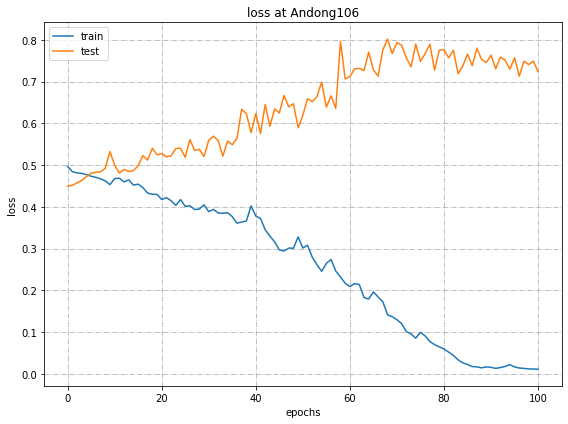

In [41]:
# plot history
fig1=plt.Figure()
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train')
ax=plt.plot(history.history['val_loss'], label='test')
plt.grid(True,linestyle='-.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss at "+list2[k])
plt.legend()
plt.tight_layout()

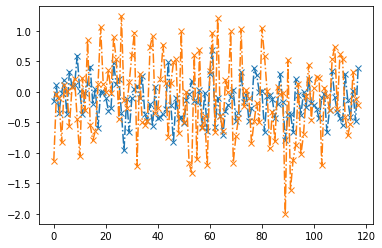

In [42]:
for i in [rmse_min_index,rmse_max_index]:
  plt.plot(yhat[:,i],'-.x')

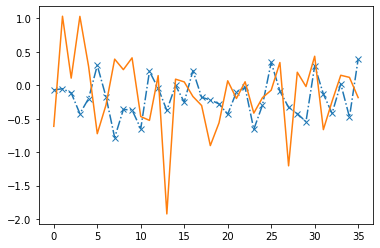

In [43]:
plt.plot(yhat[-36:,rmse_min_index],'-.x')
plt.plot(test_y[-36:,rmse_min_index])

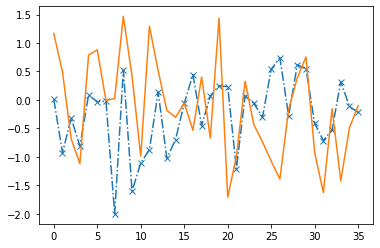

In [44]:
plt.plot(yhat[-36:,rmse_max_index],'-.x')
plt.plot(test_y[-36:,rmse_max_index])

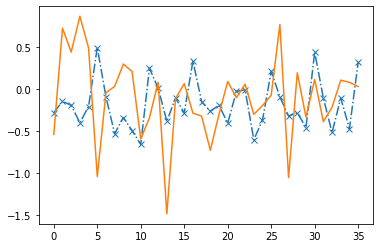

In [45]:
plt.plot(yhat[-36:,mape_min_index],'-.x')
plt.plot(test_y[-36:,mape_min_index])

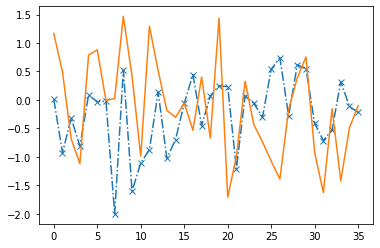

In [46]:
plt.plot(yhat[-36:,mape_max_index],'-.x')
plt.plot(test_y[-36:,mape_max_index])

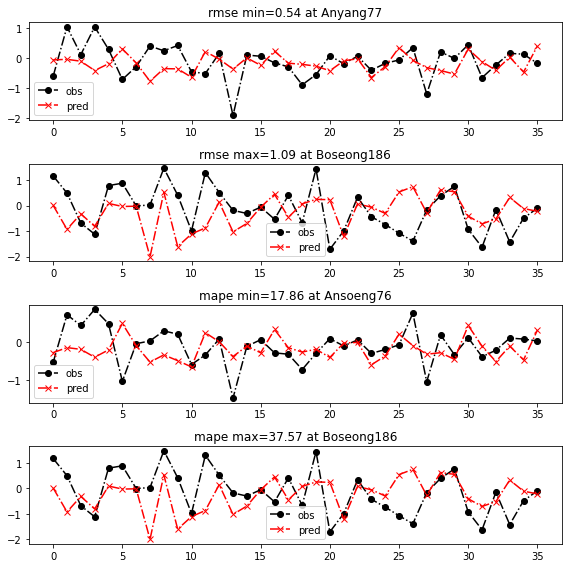

In [47]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(8, 8))
gs=GridSpec(nrows=4,ncols=1)
plot_index=[rmse_min_index,rmse_max_index,mape_min_index,mape_max_index]
plot_text=[rmse_min,rmse_max,mape_min,mape_max]
plot_title=['rmse min','rmse max','mape min','mape max']
t=-1
for j in range(4):
  t+=1
  ax=fig.add_subplot(gs[j,0])
  ax=plt.plot(test_y[-36:,plot_index[t]],'-.o',color='black') #'-.ro'
  ax=plt.plot(yhat[-36:,plot_index[t]],'-.x',color='red') #'-.s'
  ax=plt.title(plot_title[t]+'='+'%.2f' %plot_text[t]+' at '+list4[plot_index[j]])
  ax=plt.legend(['obs','pred'])
plt.tight_layout()
plt.savefig(out_dirs[0]+'/'+'n_in_'+str(n_in0)+'n_out_'+str(n_out0)+'.png')

In [48]:
# Download ket qua ve
from google.colab import files
files.download(out_dirs[0]+'/'+'n_in_'+str(n_in0)+'n_out_'+str(n_out0)+'.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>